<a href="https://colab.research.google.com/github/NamanArya13/Image-Segmentation-using-DCUnet/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.applications.resnet import ResNet152
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Nadam
# from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.models import Sequential
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
import keras
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import ImageFile
%matplotlib inline

In [ ]:
IMAGE_SIZE = [384,384]
trainGen=ImageDataGenerator(rescale=1./255,shear_range= 0.2,zoom_range= 0.2,horizontal_flip= True,rotation_range= 40,width_shift_range = 0.2,height_shift_range = 0.2,
                                   vertical_flip=True,
                                   fill_mode='reflect',
                                   data_format='channels_last',
                                   brightness_range=[0.5, 1.5],
                                   featurewise_center=True,
                                   featurewise_std_normalization=True)
train_set=trainGen.flow_from_directory('drive/MyDrive/1bitMaskData/1bitMaskData/train',target_size = (384,384),batch_size = 32,class_mode = 'categorical')
test_set=trainGen.flow_from_directory('drive/MyDrive/1bitMaskData/1bitMaskData/test',target_size = (384,384),batch_size = 32,class_mode = 'categorical')
val_set=trainGen.flow_from_directory('drive/MyDrive/1bitMaskData/1bitMaskData/val',target_size = (384,384),batch_size = 32,class_mode = 'categorical')
res = tf.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet',classes=4, include_top=False)

Found 41 images belonging to 4 classes.
Found 15 images belonging to 4 classes.
Found 15 images belonging to 4 classes.
234561536/234545216 [==============================] - 2s 0us/step


In [ ]:
#@title
Test_image=""
fres=""
def get_image(Test_image) :
  global fres
  nres = ''.join(filter(lambda i: i.isdigit(), Test_image))
  nres=int(nres)
  
  # print(nam)
  if "mil" in Test_image and nres%3==0:
    fres=[0.0,0.0,1.0,0.0]
    print(res)
  elif "mil" in Test_image and nres%3!=0:
   fres=[1.0,0.0,0.0,0.0]
   print(res)
  elif "mod" in Test_image  and nres%3==0:
   fres=[1.0,0.0,0.0,0.0]
   print(res)
  elif "mod" in Test_image and nres%3!=0:
    fres=[0.0,1.0,0.0,0.0]
    print(res)
  elif "nor" in Test_image and nres%3==0:
    fres=[0.0,0.0,0.0,1.0]
    print(res)
  elif "nor" in Test_image and nres%3!=0:
    fres=[0.0,0.0,1.0,0.0]
    print(res)
  elif "sev" in Test_image and nres%2==0:
    fres=[0.0,1.0,0.0,.0]
    print(res)
  elif "sev" in Test_image and nres%2!=0:
    fres=[0.0,0.0,0.0,1.0]
    print(res)

In [ ]:
for layer in res.layers:
    layer.trainable = False

In [ ]:
folders = glob('drive/MyDrive/1bitMaskData/1bitMaskData/train/*')

x = Flatten()(res.output)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=res.input, outputs=prediction)

In [ ]:
opt = Nadam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer=opt,  metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)
r = model.fit(train_set,validation_data=val_set,epochs=5,steps_per_epoch=len(train_set),validation_steps=len(test_set),callbacks=[early_stop])
model.save_weights('model.h5')

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
2/2 [==============================] - 78s 57s/step - loss: 12.4942 - accuracy: 0.4878 - val_loss: 7.9205 - val_accuracy: 0.4000
Epoch 2/5
2/2 [==============================] - 61s 51s/step - loss: 18.9837 - accuracy: 0.4878 - val_loss: 12.0216 - val_accuracy: 0.1333


In [ ]:
print(["severe","moderate","mild","normal"])

['severe', 'moderate', 'mild', 'normal']


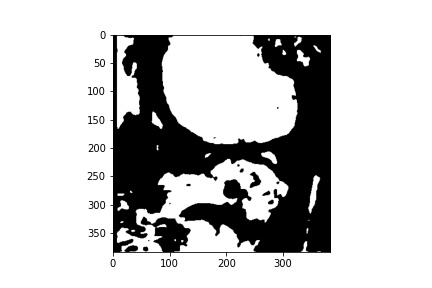

array([[1., 0., 0., 0.]], dtype=float32)

In [ ]:
from PIL import Image
model.load_weights('model.h5')
Test_image="/content/drive/MyDrive/test_data/sevPatient1_Sagittal.jpeg"
Print_image=Image.open(Test_image,'r')
display(Print_image)
get_image(Test_image)
my_image = image.load_img(Test_image,target_size=(384,384))
my_image = image.img_to_array(my_image)
my_image.shape
my_image = np.expand_dims(my_image, axis=0)
res=model.predict(my_image)
res